## Analysis and visualisation of light intensity measurements
### Spectrograms measured with USB spectrogram from Ocean Optics (borrowed from Kit Longden)

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sys import path
path.insert(1, '/Users/hannah/Dropbox/code/plottingUtilities/')
from plottingUtilities import myAxisTheme

%matplotlib inline

wavelength and intensity corresponding to blue light illumination:
458.991 nm
0.82003 uW/cm^2/nm
0.12246252 mW/cm^2 (compared to 21.44 mW/cm^2 measured with power meter)


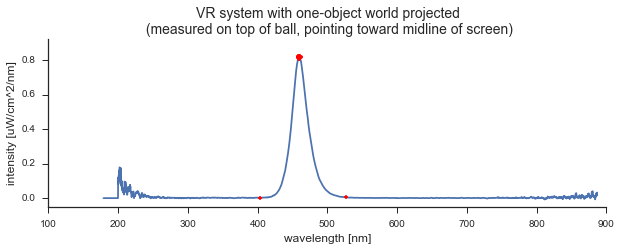

In [48]:
specf = open('/Volumes/jayaramanlab/Hannah/Projects/FlyVR/Trackball_arena_AbsoluteIrradiance_1.txt')

specDat = np.zeros((1,2))
for line in specf:
    newline = [float(line[0:line.find('\t')]),float(line[1+line.find('\t'):line.find('\r')])]
    specDat = np.vstack((specDat,newline))

specDat = np.asarray(specDat[1:,:])

#find peak in blue range:
peakInd = np.argmax(specDat[:,1])
specPeak = specDat[peakInd,0]
intensityPeak = specDat[peakInd,1]

#plot spectrum
print('wavelength and intensity corresponding to blue light illumination:')
print(str(specPeak) + ' nm')
print(str(intensityPeak) + ' uW/cm^2/nm')
fig = plt.figure(figsize=(10,3))
ax = fig.add_subplot(111)
plt.plot(specDat[:,0],specDat[:,1],'-')
ax.plot(specPeak,intensityPeak,'ro')
ax.set_ylim(-0.05,max(specDat[:,1]+0.1))
ax.set_ylabel('intensity [uW/cm^2/nm]',fontsize=12)
ax.set_xlabel('wavelength [nm]',fontsize=12)
ax.set_title('VR system with one-object world projected\n \
(measured on top of ball, pointing toward midline of screen)', fontsize=14)
myAxisTheme(ax)

#integrate over blue light peak
blueIntensity = np.sum(specDat[peakInd-270:peakInd+340,1]/1000)
plt.plot(specDat[peakInd-270,0],specDat[peakInd-270,1],'r.')
plt.plot(specDat[peakInd+340,0],specDat[peakInd+340,1],'r.')
print(str(blueIntensity) + ' mW/cm^2 (compared to 21.44 mW/cm^2 measured with power meter)')

wavelength and intensity corresponding to blue background peak:
460.61 nm
0.18947 uW/cm^2/nm
25.81856 uW/cm^2  (compared to 54.95 uW/cm2 )
wavelength and intensity corresponding to red stimulation peak:
629.329 nm
0.2068 uW/cm^2/nm
wavelength and intensity corresponding to IR stimulation peak:
851.502 nm
1.77264 uW/cm^2/nm


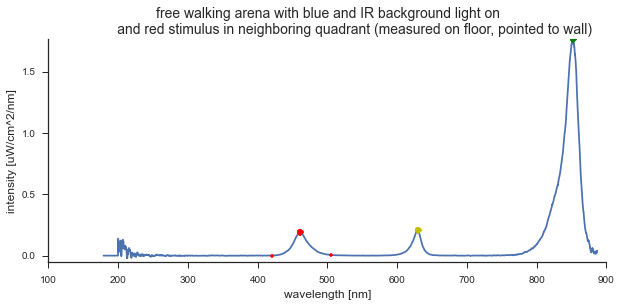

In [46]:
specf = open('/Volumes/jayaramanlab/Hannah/Projects/FlyVR/Background_LED_with Red_and_IR_AbsoluteIrradiance_1.txt')

specDat = np.zeros((1,2))
for line in specf:
    newline = [float(line[0:line.find('\t')]),float(line[1+line.find('\t'):line.find('\r')])]
    specDat = np.vstack((specDat,newline))

specDat = np.asarray(specDat[1:,:])

#find peak in blue range:
peakInd = np.argmax(specDat[0:1500,1])
specPeak = specDat[peakInd,0]
intensityPeak = specDat[peakInd,1]

print('wavelength and intensity corresponding to blue background peak:')
print(str(specPeak) + ' nm')
print(str(intensityPeak) + ' uW/cm^2/nm')

#plot spectrum

fig = plt.figure(figsize=(10,4))
ax = fig.add_subplot(111)
plt.plot(specDat[:,0],specDat[:,1],'-')
ax.plot(specPeak,intensityPeak,'ro')
ax.set_ylim(-0.05,max(specDat[:,1]))
ax.set_ylabel('intensity [uW/cm^2/nm]',fontsize=12)
ax.set_xlabel('wavelength [nm]',fontsize=12)
ax.set_title('free walking arena with blue and IR background light on \n \
             and red stimulus in neighboring quadrant (measured on floor, pointed to wall)', fontsize=14)
myAxisTheme(ax)

#integrate over blue light peak
blueIntensity = np.sum(specDat[peakInd-200:peakInd+220,1])
plt.plot(specDat[peakInd-200,0],specDat[peakInd-200,1],'r.')
plt.plot(specDat[peakInd+220,0],specDat[peakInd+220,1],'r.')
print(str(blueIntensity) + ' uW/cm^2  (compared to 54.95 uW/cm2 )')


#find peak in red range:
peakInd = np.argmax(specDat[:2500,1])
specPeak = specDat[peakInd,0]
intensityPeak = specDat[peakInd,1]

print('wavelength and intensity corresponding to red stimulation peak:')
print(str(specPeak) + ' nm')
print(str(intensityPeak) + ' uW/cm^2/nm')

ax.plot(specPeak,intensityPeak,'yo')

#find peak in IR range:
peakInd = np.argmax(specDat[:3500,1])
specPeak = specDat[peakInd,0]
intensityPeak = specDat[peakInd,1]

print('wavelength and intensity corresponding to IR stimulation peak:')
print(str(specPeak) + ' nm')
print(str(intensityPeak) + ' uW/cm^2/nm')

ax.plot(specPeak,intensityPeak,'go')
